In [2]:
import pandas as pd
import random

In [3]:
L=[]
for i in range(10000):
    a = random.randint(1,6)
    L.append(a)

In [4]:
M=[]
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    M.append(a+b)

In [5]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
t = (pd.Series(M).value_counts()/pd.Series(M).value_counts().sum()).sort_index()

In [6]:
pd.Series(L).value_counts(), pd.Series(M).value_counts()

(2    1724
 6    1702
 1    1694
 5    1636
 3    1635
 4    1609
 dtype: int64,
 7     1639
 8     1402
 6     1331
 9     1173
 5     1098
 4      858
 10     819
 11     575
 3      562
 2      277
 12     266
 dtype: int64)

In [7]:
import numpy as np
np.sum(s)
np.sum(t)

0.9999999999999999

<AxesSubplot:>

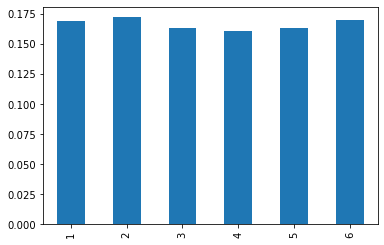

In [8]:
s.plot(kind='bar')

<AxesSubplot:>

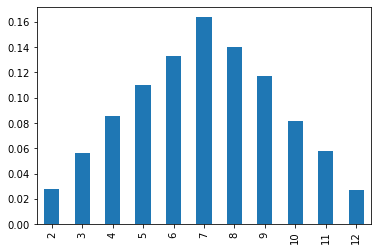

In [9]:
t.plot(kind='bar')

In [10]:
np.cumsum(s),np.cumsum(t)

(1    0.1694
 2    0.3418
 3    0.5053
 4    0.6662
 5    0.8298
 6    1.0000
 dtype: float64,
 2     0.0277
 3     0.0839
 4     0.1697
 5     0.2795
 6     0.4126
 7     0.5765
 8     0.7167
 9     0.8340
 10    0.9159
 11    0.9734
 12    1.0000
 dtype: float64)

<AxesSubplot:>

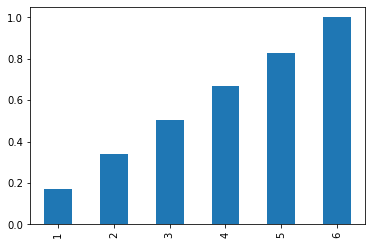

In [11]:
np.cumsum(s).plot(kind='bar')

<AxesSubplot:>

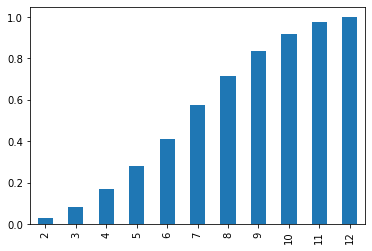

In [12]:
np.cumsum(t).plot(kind='bar')

### Parametric Density Estimation

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 
from numpy.random import normal

sample = normal(loc=50, scale=5, size=1000)

In [14]:
sample.mean(), sample.std()

(50.05126950225696, 5.108757049837959)

(array([ 13.,  56., 125., 204., 243., 198., 107.,  39.,  11.,   4.]),
 array([36.12864095, 39.29029481, 42.45194867, 45.61360254, 48.7752564 ,
        51.93691026, 55.09856412, 58.26021798, 61.42187184, 64.5835257 ,
        67.74517956]),
 <BarContainer object of 10 artists>)

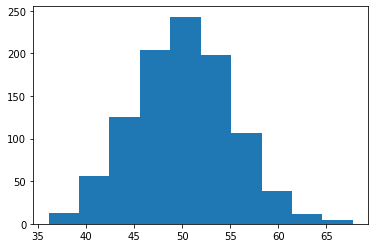

In [15]:
plt.hist(sample,bins=10)

In [16]:
sample_mean = sample.mean()
sample_std = sample.std()

In [17]:
from scipy.stats import norm
dist = norm(60,12)

In [18]:
values = np.linspace(sample.min(), sample.max(),100)

In [19]:
sample.max()

67.74517956477634

In [20]:
probabilities = [dist.pdf(value) for value in values]

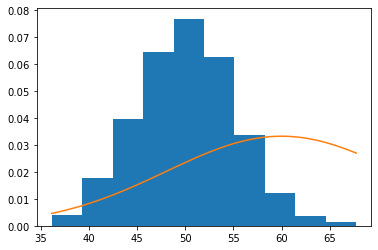

In [21]:
plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)

C:\Users\user\AppData\Local\Temp\ipykernel_8836\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<AxesSubplot:ylabel='Density'>

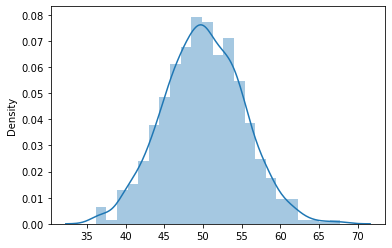

In [22]:
import seaborn as sns
sns.distplot(sample)

## KDE

In [23]:
sample1 = normal(loc=20, scale=5, size=300)
sample2= normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1,sample2))

In [24]:
sample

array([26.33251236, 25.05036358, 19.45795215, 24.82362521, 22.22637637,
       18.69408271, 15.2191619 , 10.97869892, 29.42897608, 24.85437985,
       20.5863099 , 16.56664755, 14.30981689, 21.6139302 , 10.96065419,
       19.28352597, 14.10112518, 25.28460323, 25.5448265 , 18.07614412,
       20.8026288 , 22.94621042,  6.15265174, 16.91110452, 23.44023028,
       24.57890594, 14.81574926, 20.52088169, 14.1957465 , 13.42499399,
       18.91632405,  9.27324927, 20.54566827, 12.03992753, 25.62930641,
       15.86228082, 13.67097865, 16.37636765, 21.23654393, 28.17368098,
       23.61610784, 16.0853179 , 33.47462239, 16.55951011, 18.11122669,
       13.47319046, 27.29283196, 19.34932434, 25.52445501, 22.78212974,
       24.63931655, 21.07779996,  8.17608533, 10.84070316, 23.00574818,
       15.53197461, 25.70318958, 25.02809266, 14.14276099, 25.32754285,
       29.16194229, 18.7362578 , 18.3192714 , 23.7328882 , 17.2153214 ,
       18.83108152, 18.06212471, 13.40935002, 18.53340267, 26.33

(array([ 2.,  0.,  2.,  3.,  4.,  9., 10.,  8., 15., 15., 17., 18., 20.,
        22., 20., 31., 20.,  8., 16., 18.,  9., 12.,  8.,  5.,  8., 12.,
        12., 21., 28., 17., 45., 47., 48., 59., 56., 59., 58., 50., 52.,
        33., 21., 29., 19.,  7., 10.,  6.,  6.,  2.,  0.,  3.]),
 array([ 5.7643281 ,  6.74896031,  7.73359253,  8.71822474,  9.70285695,
        10.68748917, 11.67212138, 12.65675359, 13.64138581, 14.62601802,
        15.61065023, 16.59528245, 17.57991466, 18.56454687, 19.54917909,
        20.5338113 , 21.51844351, 22.50307573, 23.48770794, 24.47234015,
        25.45697237, 26.44160458, 27.42623679, 28.41086901, 29.39550122,
        30.38013343, 31.36476565, 32.34939786, 33.33403007, 34.31866229,
        35.3032945 , 36.28792671, 37.27255893, 38.25719114, 39.24182335,
        40.22645557, 41.21108778, 42.19571999, 43.18035221, 44.16498442,
        45.14961663, 46.13424885, 47.11888106, 48.10351327, 49.08814549,
        50.0727777 , 51.05740991, 52.04204213, 53.02667434,

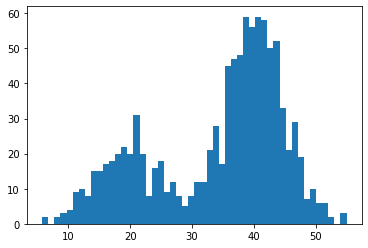

In [26]:
plt.hist(sample,bins=50)

In [27]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=5, kernel='gaussian')

sample=sample.reshape((len(sample),1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [29]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [30]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

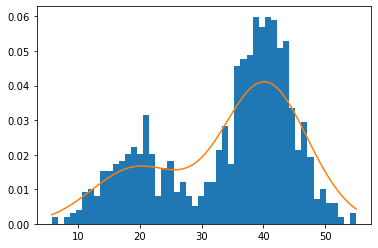

In [31]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<AxesSubplot:ylabel='Density'>

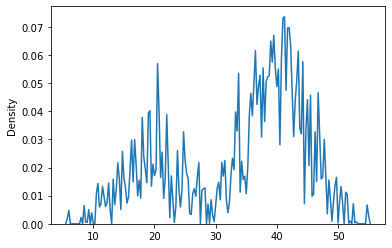

In [32]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)